<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/04_k_modes_OneHotEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [924]:
!pip install kmodes

In [925]:
import warnings
from unicodedata import normalize


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from kmodes.kmodes import KModes

# **Información**
---

**Datos**
---

Ambiente y Desarrollo Sostenible - Esterilización Canina y Felina 2021

El municipio de Puente Nacional ejecuta acciones con el fin de proteger la integridad y bienestar animal, además garantizar el control de los mismos mediante jornadas de vacunación, tenencia responsable de mascotas, promover adopción de animales sin hogar y jornadas de esterilización.

**Información de la Entidad**
- Área o dependencia	Alcaldía Municipal de Puente Nacional
- Nombre de la Entidad	Alcaldía Municipal de Puente Nacional
- Departamento	Santander
- Municipio	Puente Nacional
- Orden	Nacional
- Sector	Ambiente y Desarrollo Sostenible

**Información de Datos**
Idioma	Español
Cobertura Geográfica	Nacional
Frecuencia de Actualización	Trimestral
Fecha Emisión (aaaa-mm-dd)	09/02/2022


**Notas Aclaratorias**:

**Última actualización**
- 15 de julio de 2022

Suministró los datos: Alcaldía Municipal de Puente Nacional

path data: https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Esterilizaci-n-Canina-y-Felina-2021/t3ke-chmw/about_data

---

# **Proceso**

**Proposito**

**Aspectos**

**El factor a segmentar**


**Diccionario de datos**
- No se dispone de un diccionario bien definido, pero se interpreta la data y el conocimiento general.
  - No.: número del registro
  - Nom. Propietario: nombre del propiestario
  - Vereda/Barrio: ubicación
  - Tipo: tipo de animal
    - Canino
    - Felino
  - Sexo
    - Macho
    - Hembra
  - Nombre del Animal
  - Raza
  - Peso
  - Edad







# **Funciones**
---

In [926]:
def normalize_word(word):
  """Normaliza palabras"""
  word = word.replace(' ', '_')
  find_guion = word.find('_')
  list_word = []
  if find_guion:
    list_word = [w for w in word.split('_') if w != '']
  else:
    list_word = word
  word = list(map(lambda x: x.lower(), list_word))
  word = [normalize('NFKD', c).encode('ASCII', 'ignore').decode() for c in word]
  word = "_".join(word)
  return word


def normalize_name_columns(columns):
  """Normaliza columnas"""
  columns = list(map(lambda x: normalize_word(x), columns))
  return columns

# **Config**

---



In [927]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Esterilización Canina y Felina 2021'
paleta = sns.color_palette("tab10").as_hex()
warnings.filterwarnings("ignore")
random_seedd = 1235

# **Data**
---


In [928]:
url_esterilizacion = 'https://drive.google.com/file/d/1beObS0Occ6KpADadgcJY7OgcWdgD0pCo/view?usp=sharing'
url_esterilizacion = 'https://drive.google.com/uc?id=' + url_esterilizacion.split('/')[-2]
data_esterilizacion = pd.read_csv(url_esterilizacion, dtype='str')

Normalización de los nombres de las columnas

In [929]:
data_esterilizacion.columns = normalize_name_columns(
    data_esterilizacion.columns)

In [930]:
data_esterilizacion.head()

,no.,nom._propietario,vereda/barrio,tipo,sexo,nombre_del_animal,raza,peso,edad
0,1,Adriana Lopez,Vereda Los robles,Canino,Hembra,Negra,Criollo,13 Kg Aprox.,6 Años
1,2,Adriana Lopez,Vereda Los robles,Canino,Hembra,Venus,Labrador / Criollo,17 Kg Aprox.,12 Años
2,3,Adriana Lopez,Vereda Los robles,Canino,Hembra,Daniela,Criollo,8 Kg Aprox.,6 Meses
3,4,Alba Maria Forero,Vereda Alto semisa,Canino,Hembra,Shar,Criollo,6 Kg Aprox.,2 Años
4,5,Alba Maria Forero,Vereda Alto semisa,Felino,Hembra,Gotica,Criollo,3 kg Aprox.,6 Meses


In [931]:
data_esterilizacion['tipo'] = data_esterilizacion['tipo'].apply(
    lambda x: 'Canino' if x in ['Canino', 'Canina', 'canino'] else x)

Los valores de raza tienen diferentes denominaciones para una específica, esto es un problema de tipeo, también hay algunos canidos que están enrazados con otras razas, por lo tanto, se modificara con la primera: ejm si dice husky/pomeran se establecerá husky.

In [932]:
def asiste_raza(raza:str)->str:
  """Modifica la raza"""
  nueva_raza = raza
  if raza in ['Criolla', 'criollo']:
    nueva_raza = 'Criollo'
  elif raza in ['Cruce con Pincher']:
    nueva_raza = 'Pincher'
  elif raza in ['Labradora', 'Labrador / Criollo']:
    nueva_raza = 'Labrador'
  elif raza in ['Snauzer', 'schnauzer', 'Shnauzer']:
    nueva_raza = 'Schnauzer'
  elif raza in ['Coquer', 'Coker / Golden', 'Cocker/Labrador', 'Coker']:
    nueva_raza = 'Cocker'
  elif raza in ['Pug / Fresh']:
    nueva_raza = 'Pug'
  elif raza in ['Pitbull/Criollo', 'Pitbull / Labrador', 'Enrazada Pitbull']:
    nueva_raza = 'Pitbull'
  elif raza in ['Pastor Aleman/Criollo']:
    nueva_raza = 'Pastor Aleman'
  return nueva_raza

In [933]:
data_esterilizacion['race_set'] = data_esterilizacion['raza'].apply(
    lambda x: asiste_raza(x))

In [934]:
data_esterilizacion['peso'] = data_esterilizacion['peso'].apply(
    lambda x: str(x).replace('Aprox', '').replace('.', ''))

El peso tiene diversas nomenclaturas, por lo tanto, se empleará la escala en kg. El valor -1 significa no aplica

In [935]:
def asiste_peso(peso:list)->str:
  nomenlatura = peso[-1]
  value = peso[0]
  new_peso = peso
  match nomenlatura:
    case 'LB':
      new_peso = round(float(value) * 0.45359, 3)
    case 'LIBRAS':
      new_peso = round(float(value) * 0.45359, 3)
    case 'KG':
      new_peso = value
    case 'KL':
      new_peso = value
    case 'KILOS':
      new_peso = value
    case 'LKG':
      new_peso = value
    case 'GR':
      new_peso = round(float(value) * 0.001, 3)
    case _:
      new_peso = - 1
  return new_peso


In [936]:
data_esterilizacion['peso_kg'] = data_esterilizacion['peso'].apply(
    lambda x: asiste_peso(x.upper().split()))

In [937]:
data_esterilizacion

,no.,nom._propietario,vereda/barrio,tipo,sexo,nombre_del_animal,raza,peso,edad,race_set,peso_kg
0,1,Adriana Lopez,Vereda Los robles,Canino,Hembra,Negra,Criollo,13 Kg,6 Años,Criollo,13
1,2,Adriana Lopez,Vereda Los robles,Canino,Hembra,Venus,Labrador / Criollo,17 Kg,12 Años,Labrador,17
2,3,Adriana Lopez,Vereda Los robles,Canino,Hembra,Daniela,Criollo,8 Kg,6 Meses,Criollo,8
3,4,Alba Maria Forero,Vereda Alto semisa,Canino,Hembra,Shar,Criollo,6 Kg,2 Años,Criollo,6
4,5,Alba Maria Forero,Vereda Alto semisa,Felino,Hembra,Gotica,Criollo,3 kg,6 Meses,Criollo,3
...,...,...,...,...,...,...,...,...,...,...,...
395,396,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Catalina,Criollo,2 Kg,3 Años,Criollo,2
396,397,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Negra,Criollo,2 Kg,1 Año,Criollo,2
397,398,Yuli Constanza Gamboa Contreras,Vereda Montes,Felino,Hembra,Candy,Criollo,1 Kg,5 Meses,Criollo,1
398,399,Martha Burgos,Vereda Semisa,Felino,Macho,Zeus 1,Criollo,1 Kg,5 Meses,Criollo,1


La edad tiene diversas nomenclaturas, por lo tanto, se empleará la escala en años. El valor -1 significa no aplica

In [938]:
def asiste_year(year:list)->str:
  nomenlatura = year[-1]
  value = year[0]
  new_year = year


  match nomenlatura:
    case 'AÑOS':
      new_year = value
    case 'MESES':
      new_year = round(float(value) * 0.0833334, 3)
    case 'AÑO':
      new_year = value
    case _:
      new_year = - 1
  return new_year

In [939]:
data_esterilizacion['edad_year'] = data_esterilizacion['edad'].apply(
    lambda x: asiste_year(str(x).upper().split()))

In [940]:
data_esterilizacion

,no.,nom._propietario,vereda/barrio,tipo,sexo,nombre_del_animal,raza,peso,edad,race_set,peso_kg,edad_year
0,1,Adriana Lopez,Vereda Los robles,Canino,Hembra,Negra,Criollo,13 Kg,6 Años,Criollo,13,6
1,2,Adriana Lopez,Vereda Los robles,Canino,Hembra,Venus,Labrador / Criollo,17 Kg,12 Años,Labrador,17,12
2,3,Adriana Lopez,Vereda Los robles,Canino,Hembra,Daniela,Criollo,8 Kg,6 Meses,Criollo,8,0.50
3,4,Alba Maria Forero,Vereda Alto semisa,Canino,Hembra,Shar,Criollo,6 Kg,2 Años,Criollo,6,2
4,5,Alba Maria Forero,Vereda Alto semisa,Felino,Hembra,Gotica,Criollo,3 kg,6 Meses,Criollo,3,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Catalina,Criollo,2 Kg,3 Años,Criollo,2,3
396,397,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Negra,Criollo,2 Kg,1 Año,Criollo,2,1
397,398,Yuli Constanza Gamboa Contreras,Vereda Montes,Felino,Hembra,Candy,Criollo,1 Kg,5 Meses,Criollo,1,0.42
398,399,Martha Burgos,Vereda Semisa,Felino,Macho,Zeus 1,Criollo,1 Kg,5 Meses,Criollo,1,0.42


In [941]:
data_esterilizacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   no.                400 non-null    object
 1   nom._propietario   400 non-null    object
 2   vereda/barrio      397 non-null    object
 3   tipo               398 non-null    object
 4   sexo               398 non-null    object
 5   nombre_del_animal  400 non-null    object
 6   raza               400 non-null    object
 7   peso               400 non-null    object
 8   edad               394 non-null    object
 9   race_set           400 non-null    object
 10  peso_kg            400 non-null    object
 11  edad_year          400 non-null    object
dtypes: object(12)
memory usage: 37.6+ KB


- verda/barrio tienen 3 nulos
- tipo: 2 valores nulos
- sexo: 2 valores nulos
- edad tiene 6 nulos

Se corrigen los valores nulos de tipo y sexo

In [942]:
data_esterilizacion.fillna('No aplica', inplace=True)

No se asigna una variable categórica con base en el peso kilo porque indicar si un perro es pesado o no, dependerá de su raza, caso similar con la edad no se puede indicar si un perro es cachorro o adulto sin tener en cuenta su edad. Por lo tanto, fungiremos con el contexto de tener una tienda de mascotas y el propósito será vender productos para perros de talla grande o pequeñas, con respecto a la edad no asumiremos la variable de control de la raza. Es posible que tengamos una variable confusa, pero para cuestiones del ejerciocio asumiremos sin tener en cuenta las relaciones espurias.

In [943]:
def asiste_talla(peso: float)->str:
  talla = 'Pequeño'
  if peso == -1:
    talla = 'Sin dato'
  elif peso > 10 and peso < 26:
    talla = 'Mediano'
  elif peso > 25 and peso < 51:
    talla = 'Grande'
  elif peso > 50:
    talla = 'Gigante'
  return talla

In [944]:
data_esterilizacion[data_esterilizacion['peso_kg'] == '3,5'] = [
    '94', 'Eli Poveda Poveda', 'Vereda Peñitas', 'Canino', 'Macho',
        'Terry', 'Fresh Poodle', '3,5 kg', '3.6', 'Fresh Poodle', '3.5',-1]

data_esterilizacion[data_esterilizacion['peso_kg'] == '3,5'] = [
    '94', 'Eli Poveda Poveda', 'Vereda Peñitas', 'Canino', 'Macho',
        'Terry', 'Fresh Poodle', '3,5 kg', '3.6', 'Fresh Poodle', '3.5',-1]

In [945]:
data_esterilizacion[data_esterilizacion['peso_kg'] == '2,7'] = [
    '336', 'Olga Moreno Reyes', 'Vereda Capilla', 'Felino', 'Hembra',
    'Dulce', 'Criollo', '2,7 Kg ', '5 meses', 'Criollo', '2.7', 0.417]

In [946]:
data_esterilizacion['peso_kg'] = data_esterilizacion['peso_kg'].astype('float32')

In [947]:
data_esterilizacion['talla'] = data_esterilizacion['peso_kg'].apply(
    lambda x: asiste_talla(float(x))
)

In [948]:
data_esterilizacion['edad_year'] = data_esterilizacion['edad_year'].astype('float32')

Asumiremos
- Los animales menores de 1 años son cachorros
- Los animales de 1-5 años son jóvenes
- Los animales de 5-10 son adultos
- Los animales mayores de 10 años son ancianos

In [949]:
def asiste_edad(edad: float)->str:
  talla = 'Cachorro'
  if edad == -1:
    talla = 'Sin dato'
  elif edad > 0 and edad < 6:
    talla = 'Joven'
  elif edad > 5 and edad < 11:
    talla = 'Adulto'
  elif edad > 10:
    talla = 'Longevo'
  return talla

In [950]:
data_esterilizacion['categoria_edad'] = data_esterilizacion['edad_year'].apply(
    lambda x: asiste_edad(float(x))
)

In [951]:
data_esterilizacion['categoria_edad'].value_counts()

Joven       314
Sin dato     56
Adulto       28
Longevo       2
Name: categoria_edad, dtype: int64

In [952]:
data_esterilizacion['talla'].value_counts()

Pequeño     223
Sin dato    118
Mediano      47
Gigante       6
Grande        6
Name: talla, dtype: int64

In [953]:
data_esterilizacion['race_set'].value_counts()

Criollo               333
Pincher                18
Labrador                7
Cocker                  7
Schnauzer               6
Pitbull                 5
Fresh Poodle            5
Pug                     4
No aplica               4
Shitzu                  3
Pastor Aleman           2
Akita                   1
Beagle                  1
Salchicha               1
French Poodle           1
Pincher/ chiguagua      1
Cockapoos               1
Name: race_set, dtype: int64

In [954]:
data_esterilizacion['sexo'].value_counts()

Hembra       335
Macho         63
No aplica      2
Name: sexo, dtype: int64

In [955]:
data_esterilizacion['tipo'].value_counts()

Canino       265
Felino       133
No aplica      2
Name: tipo, dtype: int64

In [956]:
data_esterilizacion_copy = data_esterilizacion.copy()

# **Model**
---

In [957]:
matriz_data = ['categoria_edad', 'talla', 'race_set', 'sexo', 'tipo']

In [958]:
X_train = data_esterilizacion[matriz_data]

In [959]:
data_esterilizacion.head()

,no.,nom._propietario,vereda/barrio,tipo,sexo,nombre_del_animal,raza,peso,edad,race_set,peso_kg,edad_year,talla,categoria_edad
0,1,Adriana Lopez,Vereda Los robles,Canino,Hembra,Negra,Criollo,13 Kg,6 Años,Criollo,13.00,6.00,Mediano,Adulto
1,2,Adriana Lopez,Vereda Los robles,Canino,Hembra,Venus,Labrador / Criollo,17 Kg,12 Años,Labrador,17.00,12.00,Mediano,Longevo
2,3,Adriana Lopez,Vereda Los robles,Canino,Hembra,Daniela,Criollo,8 Kg,6 Meses,Criollo,8.00,0.50,Pequeño,Joven
3,4,Alba Maria Forero,Vereda Alto semisa,Canino,Hembra,Shar,Criollo,6 Kg,2 Años,Criollo,6.00,2.00,Pequeño,Joven
4,5,Alba Maria Forero,Vereda Alto semisa,Felino,Hembra,Gotica,Criollo,3 kg,6 Meses,Criollo,3.00,0.50,Pequeño,Joven


# **Preprocesamiento**
---

In [960]:
preprocess = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), matriz_data)],
    remainder='passthrough'
)

In [961]:
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['categoria_edad', 'talla', 'race_set', 'sexo',
                                  'tipo'])])

In [962]:
X_train_prep = preprocess.fit_transform(X_train)
X_train_prep = X_train_prep.toarray()
X_train_prep

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [963]:
encoded_cat = preprocess.named_transformers_['onehot'].get_feature_names_out(matriz_data)
encoded_cat

array(['categoria_edad_Adulto', 'categoria_edad_Joven',
       'categoria_edad_Longevo', 'categoria_edad_Sin dato',
       'talla_Gigante', 'talla_Grande', 'talla_Mediano', 'talla_Pequeño',
       'talla_Sin dato', 'race_set_Akita', 'race_set_Beagle',
       'race_set_Cockapoos', 'race_set_Cocker', 'race_set_Criollo',
       'race_set_French Poodle', 'race_set_Fresh Poodle',
       'race_set_Labrador', 'race_set_No aplica',
       'race_set_Pastor Aleman', 'race_set_Pincher',
       'race_set_Pincher/ chiguagua', 'race_set_Pitbull', 'race_set_Pug',
       'race_set_Salchicha', 'race_set_Schnauzer', 'race_set_Shitzu',
       'sexo_Hembra', 'sexo_Macho', 'sexo_No aplica', 'tipo_Canino',
       'tipo_Felino', 'tipo_No aplica'], dtype=object)

In [964]:
X_train_prep = pd.DataFrame(X_train_prep, columns=encoded_cat)

In [965]:
X_train_prep

,categoria_edad_Adulto,categoria_edad_Joven,categoria_edad_Longevo,categoria_edad_Sin dato,talla_Gigante,talla_Grande,talla_Mediano,talla_Pequeño,talla_Sin dato,race_set_Akita,...,race_set_Pug,race_set_Salchicha,race_set_Schnauzer,race_set_Shitzu,sexo_Hembra,sexo_Macho,sexo_No aplica,tipo_Canino,tipo_Felino,tipo_No aplica
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
396,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
397,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
398,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


# **Model Huang**
---

In [966]:
cost_huang = []
segmentos = list(range(1, 10))

for cluster in segmentos:
  try:
    model = KModes(n_jobs=-1, n_clusters=cluster, init = 'Huang', random_state=12354)
    model.fit_predict(X_train_prep)
    cost_huang.append(model.cost_)
  except:
    break

In [967]:
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost_huang})
df_cost

,Cluster,Cost
0,1,"1,060.00"
1,2,794.00
2,3,652.00
3,4,602.00
4,5,476.00
5,6,460.00
6,7,413.00
7,8,358.00
8,9,359.00


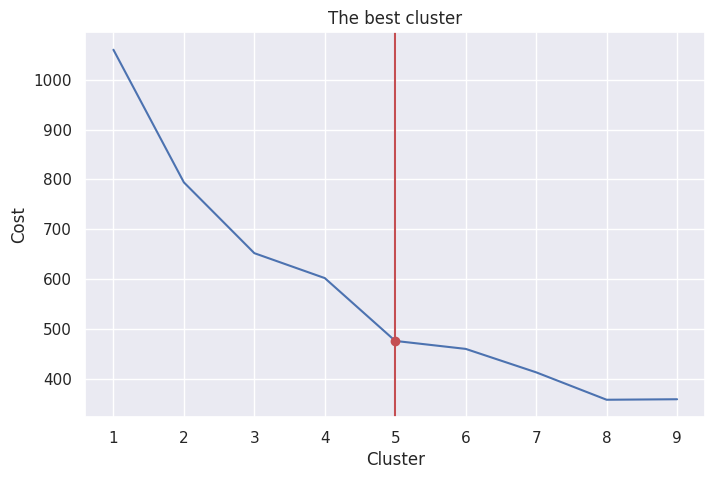

In [968]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(segmentos, cost_huang)
ax.plot(5, cost_huang[4], marker='o', color='r')
ax.axvline(x=5,  color='r')
ax.set_title("The best cluster")
ax.set_xlabel('Cluster')
ax.set_ylabel('Cost')
plt.show()

In [969]:
model_huang = KModes(n_jobs=-1, n_clusters=5, init = 'Huang', random_state=12354)
y_predict_huang = model_huang.fit_predict(X_train_prep)

In [970]:
model_huang.cluster_centroids_

array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [971]:
encoded_cat[np.where(model_huang.cluster_centroids_[0])]

array(['categoria_edad_Joven', 'talla_Sin dato', 'race_set_Criollo',
       'sexo_Hembra', 'tipo_Canino'], dtype=object)

# **Model Cao**
---

In [972]:
cost_cao = []
segmentos = list(range(1, 10))

for cluster in segmentos:
  try:
    model = KModes(n_jobs=-1, n_clusters=cluster, init = 'Cao', random_state=12354)
    model.fit_predict(X_train_prep)
    cost_cao.append(model.cost_)
  except:
    break

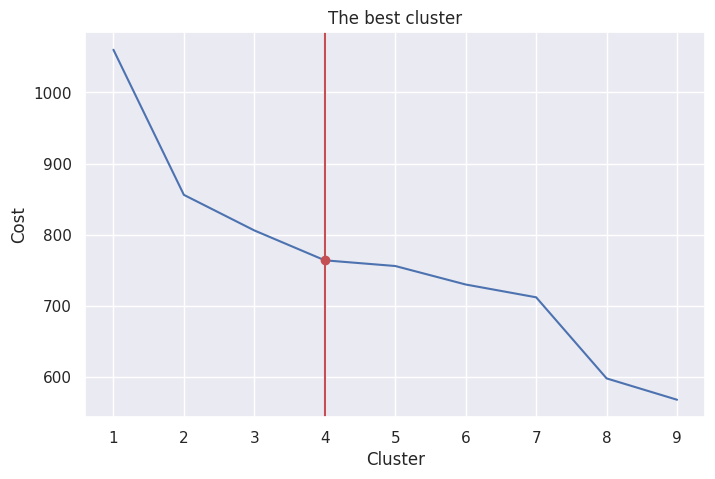

In [973]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(segmentos, cost_cao)
ax.plot(4, cost_cao[3], marker='o', color='r')
ax.axvline(x=4,  color='r')
ax.set_title("The best cluster")
ax.set_xlabel('Cluster')
ax.set_ylabel('Cost')
plt.show()

In [974]:
model_cao = KModes(n_jobs=-1, n_clusters=4, init = 'Cao', random_state=12354)
y_predict_cao = model_cao.fit_predict(X_train_prep)

In [975]:
df_cost_cost_cao = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost_cao})
df_cost_cost_cao

,Cluster,Cost
0,1,"1,060.00"
1,2,856.00
2,3,806.00
3,4,764.00
4,5,756.00
5,6,730.00
6,7,712.00
7,8,598.00
8,9,568.00


In [976]:
print('Clusters')
model_cao.cluster_centroids_

Clusters


array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]])

In [977]:
encoded_cat[np.where(model_cao.cluster_centroids_[3])]

array(['categoria_edad_Sin dato', 'talla_Sin dato', 'race_set_Criollo',
       'sexo_Hembra', 'tipo_Canino'], dtype=object)

# **Model Random**
---

In [978]:
cost_random = []
segmentos = list(range(1, 10))

for cluster in segmentos:
  try:
    model = KModes(n_jobs=-1, n_clusters=cluster, init = 'random', random_state=12354)
    model.fit_predict(X_train_prep)
    cost_random.append(model.cost_)
  except:
    break

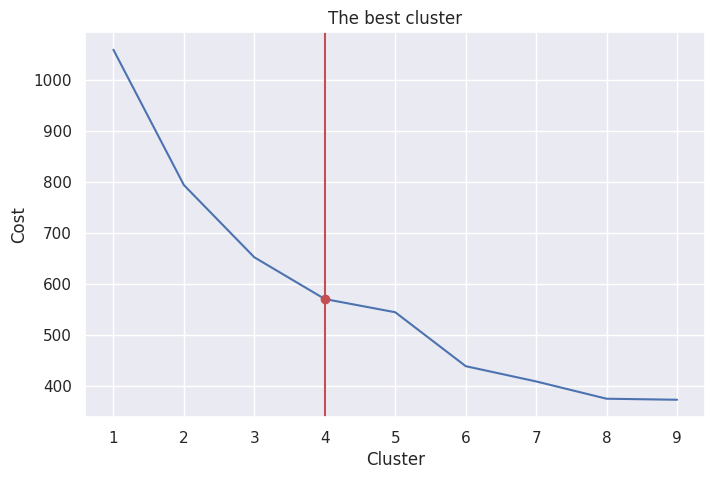

In [979]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(segmentos, cost_random)
ax.plot(4, cost_random[3], marker='o', color='r')
ax.axvline(x=4,  color='r')
ax.set_title("The best cluster")
ax.set_xlabel('Cluster')
ax.set_ylabel('Cost')
plt.show()

In [980]:
model_random = KModes(n_jobs=-1, n_clusters=4, init = 'random', random_state=12354)
y_predict_random= model_random.fit_predict(X_train_prep)

In [981]:
encoded_cat[np.where(model_random.cluster_centroids_[3])]

array(['categoria_edad_Joven', 'talla_Pequeño', 'race_set_Criollo',
       'sexo_Hembra', 'tipo_Canino'], dtype=object)

In [982]:
print('Clusters')
model_random.cluster_centroids_

Clusters


array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]])

# **Selección Modelo**

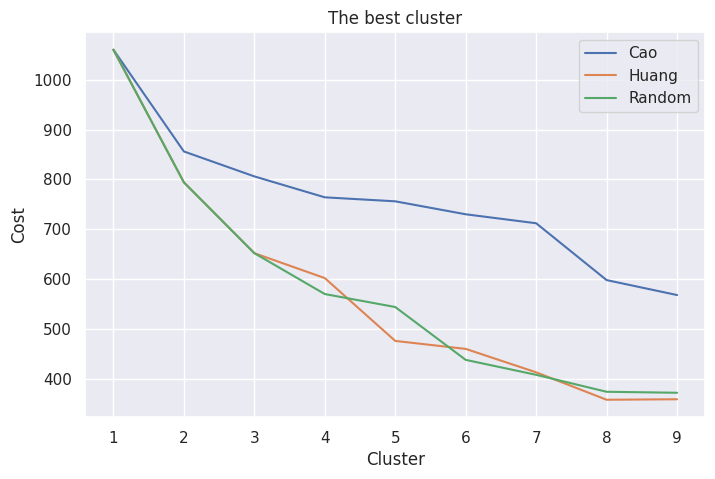

In [983]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(segmentos, cost_cao, label='Cao')
ax.plot(segmentos, cost_huang, label='Huang')
ax.plot(segmentos, cost_random, label='Random')
ax.set_title("The best cluster")
ax.set_xlabel('Cluster')
ax.set_ylabel('Cost')
plt.legend()
plt.show()

- El modelo con el costo mas bajo es el iniciado con Huang

In [984]:
model_huang= KModes(n_jobs=-1, n_clusters=5, init = 'huang', random_state=12354)
y_predict_huang = model_huang.fit_predict(X_train_prep)

In [985]:
X_train_prep['segmento'] = y_predict_huang

In [986]:
values = X_train_prep['segmento'].value_counts().values
index = X_train_prep['segmento'].value_counts().index.to_list()

In [987]:
values

array([144,  86,  82,  47,  41])

In [988]:
index

[3, 1, 0, 4, 2]

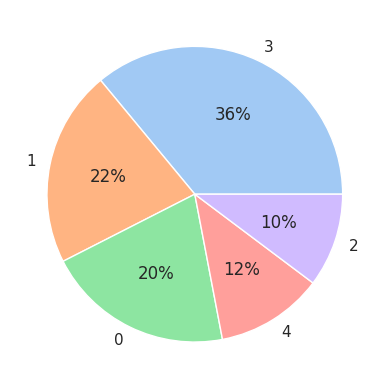

In [989]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(values, labels = index, colors = colors, autopct='%.0f%%')
plt.show()

In [990]:
print('Clusters')
model_huang.cluster_centroids_

Clusters


array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [991]:
encoded_cat[np.where(model_huang.cluster_centroids_[4])]

array(['categoria_edad_Joven', 'talla_Sin dato', 'race_set_Criollo',
       'sexo_Hembra', 'tipo_Felino'], dtype=object)

In [992]:
X_train_prep

,categoria_edad_Adulto,categoria_edad_Joven,categoria_edad_Longevo,categoria_edad_Sin dato,talla_Gigante,talla_Grande,talla_Mediano,talla_Pequeño,talla_Sin dato,race_set_Akita,...,race_set_Salchicha,race_set_Schnauzer,race_set_Shitzu,sexo_Hembra,sexo_Macho,sexo_No aplica,tipo_Canino,tipo_Felino,tipo_No aplica,segmento
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,2
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,2
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1
396,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1
397,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1
398,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1


In [993]:
cluster = pd.DataFrame(model_huang.cluster_centroids_).T
cluster.columns = ['c0', 'c1', 'c2', 'c3', 'c4']
cluster.head()

,c0,c1,c2,c3,c4
0,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,1.00,1.00
2,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00


In [994]:
cluster.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4'], dtype='object')

In [995]:
X_train_prep2 = X_train_prep.copy()
X_train_prep2['new_seg'] = -1

In [996]:
for i in range(0, X_train_prep.shape[0]):
  rows = X_train_prep.iloc[i,:].T
  data_cluster = cluster.copy()
  nucleos = []
  for j in range(0,cluster.shape[1]):
    data_cluster[f'cp{j}'] = abs(pd.Series(rows.values) - data_cluster[f'c{j}'])
    v = data_cluster[f'cp{j}'].sum()
    nucleos.append(v)
  new_c = pd.Series(nucleos).sort_values().index[0]
  X_train_prep2.iloc[i,-1] = new_c
  data_cluster[f'cp'] = pd.Series(rows.values)
  data_cluster = pd.DataFrame()

In [999]:
X_train_prep2[X_train_prep2['segmento'] == X_train_prep2['new_seg']].shape

(400, 34)

In [1000]:
data_esterilizacion_copy

,no.,nom._propietario,vereda/barrio,tipo,sexo,nombre_del_animal,raza,peso,edad,race_set,peso_kg,edad_year,talla,categoria_edad
0,1,Adriana Lopez,Vereda Los robles,Canino,Hembra,Negra,Criollo,13 Kg,6 Años,Criollo,13.00,6.00,Mediano,Adulto
1,2,Adriana Lopez,Vereda Los robles,Canino,Hembra,Venus,Labrador / Criollo,17 Kg,12 Años,Labrador,17.00,12.00,Mediano,Longevo
2,3,Adriana Lopez,Vereda Los robles,Canino,Hembra,Daniela,Criollo,8 Kg,6 Meses,Criollo,8.00,0.50,Pequeño,Joven
3,4,Alba Maria Forero,Vereda Alto semisa,Canino,Hembra,Shar,Criollo,6 Kg,2 Años,Criollo,6.00,2.00,Pequeño,Joven
4,5,Alba Maria Forero,Vereda Alto semisa,Felino,Hembra,Gotica,Criollo,3 kg,6 Meses,Criollo,3.00,0.50,Pequeño,Joven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Catalina,Criollo,2 Kg,3 Años,Criollo,2.00,3.00,Pequeño,Joven
396,397,Daniela Ballesteros,Barrio Nuevo Portal,Felino,Hembra,Negra,Criollo,2 Kg,1 Año,Criollo,2.00,1.00,Pequeño,Joven
397,398,Yuli Constanza Gamboa Contreras,Vereda Montes,Felino,Hembra,Candy,Criollo,1 Kg,5 Meses,Criollo,1.00,0.42,Pequeño,Joven
398,399,Martha Burgos,Vereda Semisa,Felino,Macho,Zeus 1,Criollo,1 Kg,5 Meses,Criollo,1.00,0.42,Pequeño,Joven


In [ ]:
X_train_test = data_esterilizacion_copy[matriz_data]